In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lungdata/GSM8254522_hPSC_BU3_fetal_lung_organoids.csv/GSM8254522_hPSC_BU3_fetal_lung_organoids.csv
/kaggle/input/lungdata/GSM8254519_hPSC_CA1_fetal_lung_cells.csv/GSM8254519_hPSC_CA1_fetal_lung_cells.csv
/kaggle/input/lungdata/GSM8254521_hPSC_BU3_fetal_lung_cells.csv/GSM8254521_hPSC_BU3_fetal_lung_cells.csv
/kaggle/input/lungdata/GSM8254520_hPSC_CA1_fetal_lung_organoids.csv/GSM8254520_hPSC_CA1_fetal_lung_organoids.csv
/kaggle/input/wong-fetal-lung-dataset-aug23/Wong_Fetal_Lung_Dataset_August_2023.xlsx


In [2]:
# Install scanpy
!pip install scanpy
# Install scvelo
!pip install scvelo
# Install latentvelo
#!pip install git+https://github.com/theislab/latentvelo.git


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8024 sha256=f715442b4675cac486ab89c036c2672b4d7b1b4e9d3a3e9c9c3320f08d6dcf84
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling se

In [5]:
!pip install anndata 

In [7]:
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd
import anndata as ad

In [8]:
# raw hPSC organoids
org = pd.read_csv('/kaggle/input/lungdata/GSM8254522_hPSC_BU3_fetal_lung_organoids.csv/GSM8254522_hPSC_BU3_fetal_lung_organoids.csv', index_col=0).T
org = ad.AnnData(org)
scv.pp.remove_duplicate_cells(org)
org.obs['cell_type'] = 'hPSC organoids'
org.obs['batch'] = 'hPSC organoids'

# raw hPSC fetal lung counts
S3 = pd.read_csv('/kaggle/input/lungdata/GSM8254519_hPSC_CA1_fetal_lung_cells.csv/GSM8254519_hPSC_CA1_fetal_lung_cells.csv', index_col=0).T
S3 = ad.AnnData(S3)
scv.pp.remove_duplicate_cells(S3)
S3.obs['cell_type'] = 'hPSC fetal lung cells'
S3.obs['batch'] = 'hPSC fetal lung cells'

In [9]:
sc.pp.filter_genes(S3, min_cells=30)
sc.pp.normalize_total(S3)
sc.pp.log1p(S3)
sc.pp.filter_genes(S3, min_cells=30)
sc.pp.normalize_total(org)
sc.pp.log1p(org)

In [10]:
sc.pp.highly_variable_genes(S3, n_top_genes = 3000, flavor='cell_ranger', batch_key='batch', subset=False)
sc.pp.highly_variable_genes(org, n_top_genes = 3000, flavor='cell_ranger', batch_key='batch', subset=False)

... storing 'cell_type' as categorical
... storing 'batch' as categorical
... storing 'cell_type' as categorical
... storing 'batch' as categorical


In [17]:
sc.pp.pca(S3)
sc.pp.pca(org)

In [12]:
sc.pp.neighbors(S3, n_neighbors=15, n_pcs=30)
sc.pp.neighbors(org, n_neighbors=15, n_pcs=30)

In [19]:
!pip install louvain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:0000:010:01


In [24]:
 import louvain

In [25]:
sc.tl.louvain(S3, resolution=0.15)
sc.tl.louvain(org, resolution=0.25)

In [26]:
sc.tl.umap(S3)
sc.tl.umap(org)

/opt/conda/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/conda/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


saving figure to file figures/hPSC_fetal_lung_umap.pdf


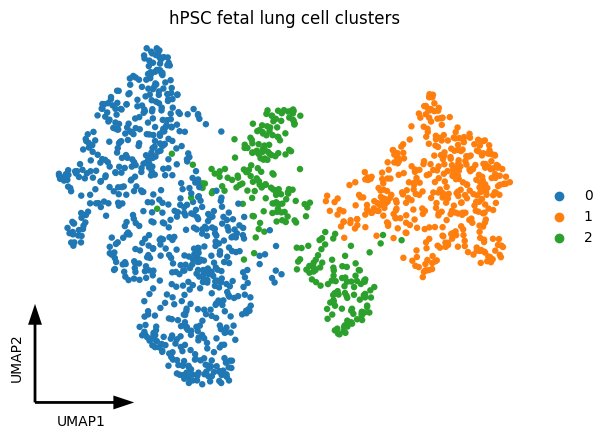

/opt/conda/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/opt/conda/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


saving figure to file figures/hPSC_organoids_umap.pdf


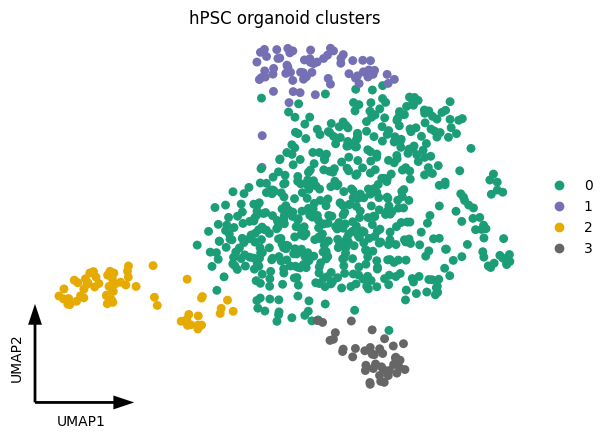

In [27]:
# plot UMAPs with clusters
scv.pl.umap(S3, color='louvain', frameon='artist',
            title='hPSC fetal lung cell clusters', fontsize=12,
           legend_loc='right',
    save='figures/hPSC_fetal_lung_umap.pdf')

scv.pl.umap(org, color='louvain', frameon='artist',
            title='hPSC organoid clusters', fontsize=12,
           legend_loc='right', palette='Dark2',
    save='figures/hPSC_organoids_umap.pdf')

In [28]:
# compute DEG
sc.tl.rank_genes_groups(S3, groupby='louvain', method='wilcoxon')
sc.tl.rank_genes_groups(org, groupby='louvain', method='wilcoxon')

In [31]:
# Import necessary modules
import os
import pandas as pd

# Ensure the directory exists within /kaggle/working/
output_directory = '/kaggle/working/data'
os.makedirs(output_directory, exist_ok=True)

# Save the data for hPSC fetal lung cells
S3_groups = []
for group in S3.obs.louvain.unique():
    temp = sc.get.rank_genes_groups_df(S3, group=group)[:100]
    temp['louvain'] = group
    S3_groups.append(temp)
pd.concat(S3_groups).to_csv(f'{output_directory}/hPSC_fetal_lung_DEG.csv')

# Save the data for hPSC organoids
org_groups = []
for group in org.obs.louvain.unique():
    temp = sc.get.rank_genes_groups_df(org, group=group)[:100]
    temp['louvain'] = group
    org_groups.append(temp)
pd.concat(org_groups).to_csv(f'{output_directory}/hPSC_organoids_DEG.csv')


In [39]:
quach_degs = pd.read_excel('/kaggle/input/wong-fetal-lung-dataset-aug23/Wong_Fetal_Lung_Dataset_August_2023.xlsx', 
                     sheet_name='Epithelial')

In [40]:
org.write('data/org_unintegrated_clusters.h5ad')
S3.write('data/S3_unintegrated_clusters.h5ad')

In [41]:
marker_genes = {}
for deg in quach_degs.keys().values:
    marker_genes[deg] = list(quach_degs[deg][~quach_degs[deg].isnull()].values)

In [42]:
# marker DEG overlaps
S3_df = sc.tl.marker_gene_overlap(S3, reference_markers = marker_genes, 
                         method='overlap_coef')

In [43]:
org_df = sc.tl.marker_gene_overlap(org, reference_markers = marker_genes,
                         method='overlap_coef')

In [44]:
S3_df.to_csv('data/hPSC_fetal_lung_overlap.csv')
org_df.to_csv('data/hPSC_organoids_overlap.csv')

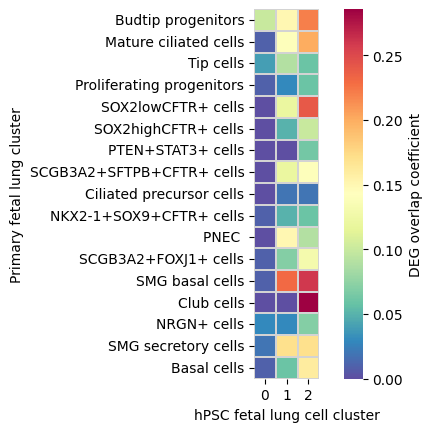

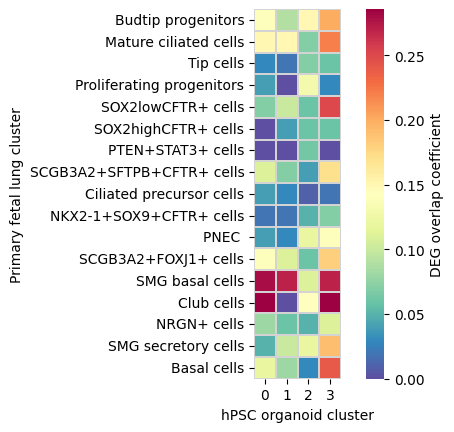

In [45]:
# plot marker DEGs. 
# remove stromal-like since they only have a small number of genes.

import seaborn as sns
import matplotlib.pyplot as plt

s = sns.heatmap(S3_df.loc[~S3_df.index.isin(['Stromal-like cells 1', 'Stromal-like cells 2'])], 
            cmap='Spectral_r', linewidths=0.01, linecolor='#D3D3D3', square=True,
            cbar_kws={'label': 'DEG overlap coefficient'})
s.set(xlabel='hPSC fetal lung cell cluster', ylabel='Primary fetal lung cluster')
plt.savefig('figures/hPSC_fetal_lung_deg_overlap.pdf')
plt.show()

import seaborn as sns
s = sns.heatmap(org_df.loc[~org_df.index.isin(['Stromal-like cells 1', 'Stromal-like cells 2'])],
            cmap='Spectral_r', linewidths=0.01, linecolor='#D3D3D3', square=True, 
            cbar_kws={'label': 'DEG overlap coefficient'})
s.set(xlabel='hPSC organoid cluster', ylabel='Primary fetal lung cluster')
plt.savefig('figures/hPSC_organoids_deg_overlap.pdf')
plt.show()